In [43]:
import numpy as np
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [44]:
os.listdir()

['.ipynb_checkpoints', 'bottle.ipynb', 'jpg', 'Reject', 'threshold']

In [45]:
# from PIL import Image
# import imagehash
import os,glob
import numpy as np
import time
import matplotlib.pyplot as plt
# from joblib import Parallel, delayed,dump,load
# from multiprocessing import Pool

files=glob.glob("*.HEIC")

In [46]:
all_files = os.listdir(".")
print("All files in the current directory:", all_files)


All files in the current directory: ['.ipynb_checkpoints', 'bottle.ipynb', 'jpg', 'Reject', 'threshold']


In [ ]:
from PIL import Image
import pillow_heif  # Ensure this library is installed
import os
import glob

# Print the current working directory
print("Current working directory:", os.getcwd())

# List all files in the current directory for debugging
all_files = os.listdir(".")
print("All files in the current directory:", all_files)

# Ensure the target folders exist
if not os.path.exists("./jpg/threshold"):
    os.makedirs("./jpg/threshold")
if not os.path.exists("./jpg/reject"):
    os.makedirs("./jpg/reject")

# Get all HEIC files in the 'threshold' and 'Reject' directories
threshold_files = glob.glob("threshold/*.HEIC")  # Search in the threshold folder
reject_files = glob.glob("Reject/*.HEIC")        # Search in the Reject folder

# Debugging output
print("Found HEIC files in threshold:", threshold_files)
print("Found HEIC files in Reject:", reject_files)

# Function to convert HEIC files to JPG
def convert_heic_to_jpg(heic_files, output_dir):
    for file in heic_files:
        print(f"Processing file: {file}")  # Debugging statement
        heif_file = pillow_heif.read_heif(file)  # Read the HEIC file

        # Convert the HEIC to an Image object
        image = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            "raw",
        )

        # Create the output path for the JPEG file
        output_path = os.path.join(output_dir, os.path.basename(file)[:-5] + '.jpg')  # Change extension to .jpg
        print(f"Saving to: {output_path}")  # Debugging statement
        
        # Save the image as JPEG in the corresponding folder
        image.save(output_path, "JPEG")
        print(f"Saved: {output_path}")  # Confirmation statement

# Convert HEIC files in the threshold folder
if threshold_files:
    convert_heic_to_jpg(threshold_files, "./jpg/threshold")
else:
    print("No HEIC files found in the threshold folder.")

# Convert HEIC files in the Reject folder
if reject_files:
    convert_heic_to_jpg(reject_files, "./jpg/reject")
else:
    print("No HEIC files found in the Reject folder.")

# Completion message
print("All conversions completed successfully!")


In [47]:
import os
accept_path="C:\\Users\\saike\\OneDrive - WOXSEN UNIVERSITY\\Desktop\\dataset1\\jpg\\reject"
reject_path="C:\\Users\\saike\\OneDrive - WOXSEN UNIVERSITY\\Desktop\\dataset1\\jpg\\threshold"
# Check the files in each folder
# print(f"Files in accept path: {os.listdir(accept_path)}")
# print(f"Files in reject path: {os.listdir(reject_path)}")


In [48]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths to the dataset
accept_path = 'C:\\Users\\saike\\OneDrive - WOXSEN UNIVERSITY\\Desktop\\dataset1\\jpg\\threshold'   # These images correspond to "Accept"
reject_path = 'C:\\Users\\saike\\OneDrive - WOXSEN UNIVERSITY\\Desktop\\dataset1\\jpg\\reject'   # These images correspond to "Reject"

# Function to load and label the images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    
    if not os.path.exists(folder):
        print(f"Folder {folder} does not exist.", flush=True)
        return images, labels

    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        if not os.path.isfile(file_path):
            print(f"{file_path} is not a file.", flush=True)
            continue
        
        img = cv2.imread(file_path)
        
        if img is None:
            print(f"Failed to load image {file_path}", flush=True)
            continue

        img = cv2.resize(img, (224, 224))  # Resize to standard size
        images.append(img)
        labels.append(label)
    
    print(f"Loaded {len(images)} images from {folder}", flush=True)
    return images, labels

# Load the Accept and Reject images
accept_images, accept_labels = load_images_from_folder(accept_path, 1)   # 1 for "Accept"
reject_images, reject_labels = load_images_from_folder(reject_path, 0)   # 0 for "Reject"

# Combine the accept and reject images and labels
images = accept_images + reject_images
labels = accept_labels + reject_labels

if len(images) == 0:
    print("No images were loaded. Please check your dataset paths and image files.", flush=True)
else:
    # Convert lists to numpy arrays for compatibility with ML models
    images = np.array(images)
    labels = np.array(labels)

    # Print out the shape of the images and labels to ensure data consistency
    print(f"Total number of images: {len(images)}", flush=True)
    print(f"Total number of labels: {len(labels)}", flush=True)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Checking the shapes of the splits
    print("Training data shape:", X_train.shape, flush=True)
    print("Test data shape:", X_test.shape, flush=True)
    print("Training labels shape:", y_train.shape, flush=True)
    print("Test labels shape:", y_test.shape, flush=True)


Loaded 349 images from C:\Users\saike\OneDrive - WOXSEN UNIVERSITY\Desktop\dataset1\jpg\threshold
Loaded 1419 images from C:\Users\saike\OneDrive - WOXSEN UNIVERSITY\Desktop\dataset1\jpg\reject
Total number of images: 1768
Total number of labels: 1768
Training data shape: (1414, 224, 224, 3)
Test data shape: (354, 224, 224, 3)
Training labels shape: (1414,)
Test labels shape: (354,)


In [36]:
print("\nThreshold Images and Labels:")
for filename, label in zip(reject_images, reject_labels):
    # print(f"Filename: {filename}, Label: {label}")

SyntaxError: incomplete input (33954254.py, line 3)

In [49]:
# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\saike\mypy\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.7465 - loss: 0.9346 - val_accuracy: 0.8107 - val_loss: 0.4833
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7863 - loss: 0.5175 - val_accuracy: 0.8107 - val_loss: 0.5425
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7976 - loss: 0.5044 - val_accuracy: 0.8107 - val_loss: 0.4670
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.7873 - loss: 0.4714 - val_accuracy: 0.8164 - val_loss: 0.4286
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.7904 - loss: 0.4424 - val_accuracy: 0.8107 - val_loss: 0.3993
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8071 - loss: 0.3842 - val_accuracy: 0.8136 - val_loss: 0.4257
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8186 - loss: 0.3971 - val_accuracy: 0.8051 - val_loss: 0.4237
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8174 - loss: 0.3497 - val_accuracy: 0.8249 - v

In [53]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8471 - loss: 0.3494
Test accuracy: 0.8362


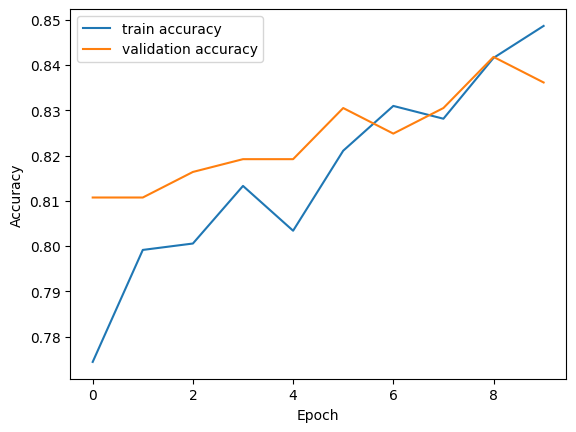

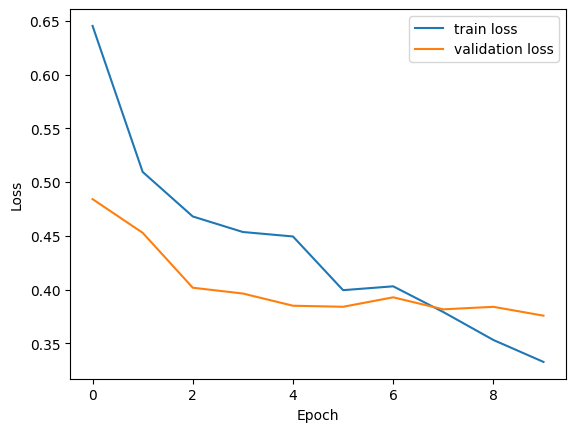

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict the labels for test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)  # Round off the sigmoid output to get binary labels

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step
[[278   9]
 [ 49  18]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       287
           1       0.67      0.27      0.38        67

    accuracy                           0.84       354
   macro avg       0.76      0.62      0.64       354
weighted avg       0.82      0.84      0.81       354



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


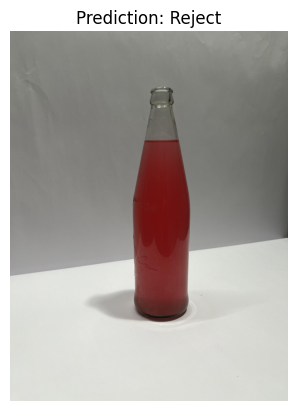

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Preprocess the external image for model input."""
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    
    # Resize the image to match the input size of the model (224x224)
    img = cv2.resize(img, (224, 224))
    
    # Normalize the image (rescale pixel values to be between 0 and 1)
    img = img.astype('float32') / 255.0
    
    # Expand the dimensions of the image to match the input shape of the model (1, 224, 224, 3)
    img = np.expand_dims(img, axis=0)
    
    return img

def predict_image(model, img_path):
    """Make a prediction on the external image using the trained model."""
    img = img_path  # Use the preprocessed image passed from preprocess_image
    
    if img is None:
        return
    
    # Predict using the trained model
    prediction = model.predict(img)
    
    # Convert the prediction to a binary label (0 or 1)
    label = np.round(prediction)[0][0]
    
    # Interpret the result based on the trained labels
    result = "Accept" if label == 1 else "Reject"
    
    # Display the image and the prediction
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Load original image for display
    plt.imshow(original_image)
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()

# Example usage
image_path = "C:\\Users\\saike\\OneDrive - WOXSEN UNIVERSITY\\Desktop\\dataset1\\jpg\\threshold\\IMG_4206.jpg"
img_path = preprocess_image(image_path)

# Assuming `model` is your trained model
predict_image(model, img_path)
